# Segmenting and Clustering Neighbourhoods in Toronto

This is the peer graded assignment on the clustering of the neighbourhoods in Toronto. 

I have included all three questions in this workbook and have labelled the questions as 1, 2 and 3. 


### Import Libraries

In [530]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

## Question 1 Scraping the Wikipedia page to get the postal codes

The first question asks to scrape wikipedia and create the dataframe in the form posted. 

In [531]:
# Loading raw data, all the tables in the wikipedia page...
raw_data = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M",flavor='bs4')

In [532]:
# Extracting the data I need and creating the dataframe
postal_codes = raw_data[0]
postal_codes = postal_codes[['Postal Code','Borough','Neighborhood']]

#### Inspecting the dataframe

In [533]:
postal_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Postal Code   180 non-null    object
 1   Borough       180 non-null    object
 2   Neighborhood  103 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


In [534]:
postal_codes.describe(include='all')

,Postal Code,Borough,Neighborhood
count,180,180,103
unique,180,11,99
top,M9M,Not assigned,Downsview
freq,1,77,4


*From the info above, we can see that there are no duplicate Postal Code values and there are 77 instances of "Not assigned". Therefore we can remove the "Not assigned" and do not need any further processing on the "Postal Code" column*

In [535]:
postal_codes_final = postal_codes[postal_codes['Borough'] != 'Not assigned'].reset_index(drop=True)

In [536]:
postal_codes_final.describe(include='all')

,Postal Code,Borough,Neighborhood
count,103,103,103
unique,103,10,99
top,M1T,North York,Downsview
freq,1,24,4


In [537]:
#Checking for null values
postal_codes_final.isnull().sum()

Postal Code     0
Borough         0
Neighborhood    0
dtype: int64

*No null values in the final dataframe*

In [538]:
postal_codes_final.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [539]:
postal_codes_final.shape

(103, 3)

**Number of Rows of the dataframe is 103**

****

## Question 2: Adding the Latitude and Longitude data to the dataframe

Question 2 asks you to get the latitude and longitude data for the neighbourhoods from the previous question and append it to the existing dataframe.

****Unfortunately the geocoder library was not working. I decided below to use the csv file provided in the assignment.****

In [540]:
# Load Coordinates CSV file
coord_df = pd.read_csv('http://cocl.us/Geospatial_data')

In [541]:
df_final = pd.merge(postal_codes_final,coord_df,on ='Postal Code')

In [542]:
df_final

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


***

## Question 3: Exploring and clustering the neighbourhoods

As per the question, I decided to focus on only the boroughs that contain the word '**Toronto**'. So the first step was to filter the dataframe for entries containing **Toronto**.

In [543]:
# Filter out all neighbourhoods that contain the name "Toronto"
df_toronto = df_final[df_final['Borough'].str.contains('Toronto')].reset_index(drop=True)

In [544]:
df_toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


**Location data analysis begins**

In [545]:
import json
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import folium

In [546]:
# Get coordinates of Toronto

address = 'Toronto, Canada'
geolocator = Nominatim(user_agent = "toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The geographical coordinates of Toronto are:{},{}".format( latitude, longitude))

The geographical coordinates of Toronto are:43.6534817,-79.3839347


In [547]:
#Create Toronto Map
toronto_map = folium.Map(location=[latitude,longitude], zoom_start= 13)

In [548]:
### Adding postal codes to the map...

for latitude , longitude, postal_code, neighborhood in zip(df_toronto['Latitude'],df_toronto['Longitude'],df_toronto['Postal Code'],df_toronto['Neighborhood']):
    label='{},{}'.format(postal_code,neighborhood)
    label = folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [latitude,longitude],
    radius = 5,
    popup=label,
    fill=True,
    fill_color='blue',
    fill_opacity=0.7,
    parse_html=False).add_to(toronto_map)

**Draw Map with postal codes and neighbourhoods added**

In [549]:
# Display map showing the various postal codes and corresponding neighbourhoods
toronto_map

**Foursquare calls**

In [550]:
### Defining Foursquare Credentials and conducting analyses

import requests

CLIENT_ID = 'QMAOL0EJQ0I0TLP4EK50DS4WEX5SUX5I4MDYO00V1GO3JORY'
CLIENT_SECRET= '53CQLIUKBESM4JF52KHHDEVCRKFWDH0Y44YS5MDWRG0ZPLBV'
VERSION = '20180605'
LIMIT=100

In [551]:
# Extract coordinates of the first postal code
n_lat = df_toronto.loc[0,'Latitude']
n_long = df_toronto.loc[0,'Longitude']

In [552]:
# Create the first URL to foursquare using the first postal code coordinates. This will allow us to inspect the returned 
# json file to understand how the data is structured. This will help later to extract the needed data.
radius = 500
limit = 100


url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    n_lat,
    n_long,
    radius,
    limit)



#### Initial Foursquare data evaluation

In [553]:
# Get results from foursquare API

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ed44e37660a9f001b390513'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 45,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

In [554]:
# Filter results to show venues
venues = results['response']['groups'][0]['items']
venues

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '54ea41ad498e9a11e9e13308',
   'name': 'Roselle Desserts',
   'location': {'address': '362 King St E',
    'crossStreet': 'Trinity St',
    'lat': 43.653446723052674,
    'lng': -79.3620167174383,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.653446723052674,
      'lng': -79.3620167174383}],
    'distance': 143,
    'postalCode': 'M5A 1K9',
    'cc': 'CA',
    'city': 'Toronto',
    'state': 'ON',
    'country': 'Canada',
    'formattedAddress': ['362 King St E (Trinity St)',
     'Toronto ON M5A 1K9',
     'Canada']},
   'categories': [{'id': '4bf58dd8d48988d16a941735',
     'name': 'Bakery',
     'pluralName': 'Bakeries',
     'shortName': 'Bakery',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'grou

In [555]:
# Convert json file into pandas dataframe

explored_venues = json_normalize(venues)
explored_venues.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood
0,e-0-54ea41ad498e9a11e9e13308-0,0,"[{'summary': 'This spot is popular', 'type': '...",54ea41ad498e9a11e9e13308,Roselle Desserts,362 King St E,Trinity St,43.653447,-79.362017,"[{'label': 'display', 'lat': 43.65344672305267...",143,M5A 1K9,CA,Toronto,ON,Canada,"[362 King St E (Trinity St), Toronto ON M5A 1K...","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN
1,e-0-53b8466a498e83df908c3f21-1,0,"[{'summary': 'This spot is popular', 'type': '...",53b8466a498e83df908c3f21,Tandem Coffee,368 King St E,at Trinity St,43.653559,-79.361809,"[{'label': 'display', 'lat': 43.65355870959944...",122,NaN,CA,Toronto,ON,Canada,"[368 King St E (at Trinity St), Toronto ON, Ca...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN,NaN
2,e-0-4ae5b91ff964a520a6a121e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4ae5b91ff964a520a6a121e3,Morning Glory Cafe,457 King St. E,Gilead Place,43.653947,-79.361149,"[{'label': 'display', 'lat': 43.65394694263529...",54,M5A 1L6,CA,Toronto,ON,Canada,"[457 King St. E (Gilead Place), Toronto ON M5A...","[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",0,[],39686393,NaN
3,e-0-574c229e498ebb5c6b257902-3,0,"[{'summary': 'This spot is popular', 'type': '...",574c229e498ebb5c6b257902,Cooper Koo Family YMCA,461 Cherry St,NaN,43.653249,-79.358008,"[{'label': 'display', 'lat': 43.65324910177244...",239,M5A 0H7,CA,Toronto,ON,Canada,"[461 Cherry St, Toronto ON M5A 0H7, Canada]","[{'id': '52e81612bcbc57f1066b7a37', 'name': 'D...",0,[],NaN,NaN
4,e-0-50760559e4b0e8c7babe2497-4,0,"[{'summary': 'This spot is popular', 'type': '...",50760559e4b0e8c7babe2497,Body Blitz Spa East,497 King Street East,btwn Sackville St and Sumach St,43.654735,-79.359874,"[{'label': 'display', 'lat': 43.65473505045365...",80,M5A 1L9,CA,Toronto,ON,Canada,[497 King Street East (btwn Sackville St and S...,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",0,[],NaN,NaN


In [556]:
filtered_columns = ['venue.name','venue.categories','venue.location.lat','venue.location.lng']

In [557]:
explored_venues = explored_venues.loc[:,filtered_columns]

In [558]:
explored_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Roselle Desserts,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",43.653447,-79.362017
1,Tandem Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",43.653559,-79.361809
2,Morning Glory Cafe,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",43.653947,-79.361149
3,Cooper Koo Family YMCA,"[{'id': '52e81612bcbc57f1066b7a37', 'name': 'D...",43.653249,-79.358008
4,Body Blitz Spa East,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",43.654735,-79.359874


#### Function used in the lab was used to extract the categories of the various venues

In [559]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [560]:
explored_venues['venue.categories'] = explored_venues.apply(get_category_type, axis=1)


In [561]:
explored_venues.rename(columns={'venue.name':'Name','venue.categories':'Categories','venue.location.lat':'Latitude','venue.location.lng':'Longitude'},inplace=True)

#### Final dataframe of the selected Postal Code. This process was however used to extract one set of venues data. It will be automated for all the Postal Codes in the next section.

In [562]:
explored_venues.head()

,Name,Categories,Latitude,Longitude
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149
3,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
4,Body Blitz Spa East,Spa,43.654735,-79.359874


****After the analysis above, I now have a process to call, process and clean up the json data into a pandas dataframe.
The next step is to automate the process for all the postal codes in our area of concern. I re-used the code from the lab to get the nearby venues and clean up the data.****

In [563]:
### Function from Lab that gets the venues for all the neighborhoods

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal Code', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [564]:
###Get all the data for the Toronto neighborhoods...

toronto_venues = getNearbyVenues(names=df_toronto['Postal Code'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

M5A
M7A
M5B
M5C
M4E
M5E
M5G
M6G
M5H
M6H
M5J
M6J
M4K
M5K
M6K
M4L
M5L
M4M
M4N
M5N
M4P
M5P
M6P
M4R
M5R
M6R
M4S
M5S
M6S
M4T
M5T
M4V
M5V
M4W
M5W
M4X
M5X
M4Y
M7Y


In [565]:
# Explore the dataframe
toronto_venues.shape
toronto_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Postal Code             1613 non-null   object 
 1   Neighborhood Latitude   1613 non-null   float64
 2   Neighborhood Longitude  1613 non-null   float64
 3   Venue                   1613 non-null   object 
 4   Venue Latitude          1613 non-null   float64
 5   Venue Longitude         1613 non-null   float64
 6   Venue Category          1613 non-null   object 
dtypes: float64(4), object(3)
memory usage: 88.3+ KB


In [566]:
toronto_venues.head()

,Postal Code,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M5A,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,M5A,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,M5A,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,M5A,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,M5A,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [567]:
### How many venues were returned per neighborhood

toronto_venues.groupby('Postal Code').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postal Code,,,,,,
M4E,5,5,5,5,5,5
M4K,42,42,42,42,42,42
M4L,22,22,22,22,22,22
M4M,40,40,40,40,40,40
M4N,3,3,3,3,3,3
M4P,9,9,9,9,9,9
M4R,21,21,21,21,21,21
M4S,36,36,36,36,36,36
M4T,3,3,3,3,3,3


In [568]:
### How many unique categories

print('There are {} unique venue categories'.format(len(toronto_venues['Venue Category'].unique())))

There are 239 unique venue categories


### Analyse each neighbourhood

#### Since the venue categories are categorical data, I need to onehot encode them before further analysis

In [569]:
toronto_venues_onehot = pd.get_dummies(toronto_venues,columns=['Venue Category'],prefix = "", prefix_sep='')

In [570]:
# Size of dataframe
print((toronto_venues.shape))

(1613, 7)


In [571]:
toronto_venues_onehot.head()

,Postal Code,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,M5A,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [572]:
toronto_onehot = toronto_venues_onehot.drop(['Neighborhood Latitude', 'Neighborhood Longitude','Venue', 'Venue Latitude', 'Venue Longitude'],axis=1)

In [573]:
toronto_onehot.shape

(1613, 240)

In [574]:
toronto_grouped = toronto_onehot.groupby('Postal Code').mean().reset_index()

In [575]:
toronto_grouped.head()

,Postal Code,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,M4E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000,0.

In [576]:
toronto_grouped.shape

(39, 240)

****Next I checked for the top 5 venues in each Postal Code****

In [577]:
num_top_venues = 5

for hood in toronto_grouped['Postal Code']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Postal Code'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M4E----
               venue  freq
0       Neighborhood   0.2
1  Health Food Store   0.2
2                Pub   0.2
3        Coffee Shop   0.2
4              Trail   0.2


----M4K----
                    venue  freq
0        Greek Restaurant  0.21
1      Italian Restaurant  0.07
2             Coffee Shop  0.07
3  Furniture / Home Store  0.05
4          Ice Cream Shop  0.05


----M4L----
                  venue  freq
0                  Park  0.09
1  Fast Food Restaurant  0.09
2        Sandwich Place  0.09
3     Food & Drink Shop  0.05
4    Italian Restaurant  0.05


----M4M----
         venue  freq
0         Café  0.10
1  Coffee Shop  0.08
2    Gastropub  0.05
3       Bakery  0.05
4      Brewery  0.05


----M4N----
               venue  freq
0               Park  0.33
1           Bus Line  0.33
2        Swim School  0.33
3  Afghan Restaurant  0.00
4             Museum  0.00


----M4P----
                  venue  freq
0      Department Store  0.11
1           Pizza Place  0.11
2     

In [578]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

***Next I look to create a dataframe showing the top 10 venues per Postal Code... I re-used the code from the lab***

In [579]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postal Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Postal Code'] = toronto_grouped['Postal Code']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,Trail,Health Food Store,Neighborhood,Coffee Shop,Pub,Donut Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant
1,M4K,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Furniture / Home Store,Restaurant,Bubble Tea Shop,Indian Restaurant,Spa,Juice Bar
2,M4L,Sandwich Place,Park,Fast Food Restaurant,Ice Cream Shop,Pub,Burrito Place,Board Shop,Fish & Chips Shop,Italian Restaurant,Restaurant
3,M4M,Café,Coffee Shop,Bakery,Gastropub,American Restaurant,Brewery,Yoga Studio,Sandwich Place,Fish Market,Italian Restaurant
4,M4N,Park,Swim School,Bus Line,Yoga Studio,Diner,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


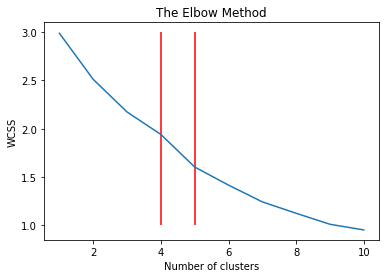

In [580]:
from sklearn.cluster import KMeans
wcss = []
#toronto_grouped_clustering = toronto_grouped.drop('Postal Code', 1)
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(toronto_grouped_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.vlines(5,ymin=1,ymax=3,color='red')
plt.vlines(4,ymin=1,ymax=3,color='red')
plt.show()



#### The above analysis was to find the optimum number of clusters. The graph however was not as helpful as I would have liked. However, from the graph, you will notice that the "elbow" or the last big drop was between 4 and 5 clusters before going into a gentle decline. Therefore 5 clusters was chosen as optimum.


In [581]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering )

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 0, 0, 0, 3, 0])

#### Clustered Postal Codes clusters are added back into the main dataframe below.

In [582]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = df_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Postal Code'), on='Postal Code')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Park,Pub,Bakery,Theater,Breakfast Spot,Café,Ice Cream Shop,French Restaurant,Chocolate Shop
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Yoga Studio,Creperie,Beer Bar,Smoothie Shop,Sandwich Place,Burger Joint,Burrito Place,Café
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Middle Eastern Restaurant,Cosmetics Shop,Japanese Restaurant,Italian Restaurant,Café,Bubble Tea Shop,Bookstore,Tea Room
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Cocktail Bar,American Restaurant,Restaurant,Gastropub,Creperie,Theater,Gym,Clothing Store
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Trail,Health Food Store,Neighborhood,Coffee Shop,Pub,Donut Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant


### Final mapping of the various clusters. 

In [583]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Postal Code'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

---

### Analysis of the various Clusters.

#### Cluster 0

In [584]:
cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Text(0.5, 1.0, '3rd Most Common Venue')

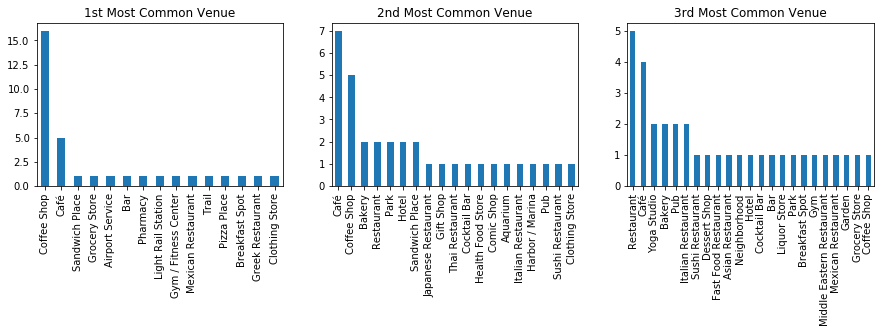

In [585]:
%matplotlib inline

fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
cluster1['1st Most Common Venue'].value_counts().plot(kind='bar',ax=ax1)
cluster1['2nd Most Common Venue'].value_counts().plot(kind='bar',ax=ax2)
cluster1['3rd Most Common Venue'].value_counts().plot(kind='bar',ax=ax3)
ax1.set_title('1st Most Common Venue')
ax2.set_title('2nd Most Common Venue')
ax3.set_title('3rd Most Common Venue')

As can be seen above, Cluster 0 is the largest cluster, with most of the neighborhoods belonging to this cluster. From the most common venues, it is clear that "Coffee Shops", "Cafes" and "Restaurants" dominate as the most common venues. This cluster can be seen as the food (coffee shop, restaurant and cafes) venues cluster.  

---

### Cluster 1

In [586]:
cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Text(0.5, 1.0, '3rd Most Common Venue')

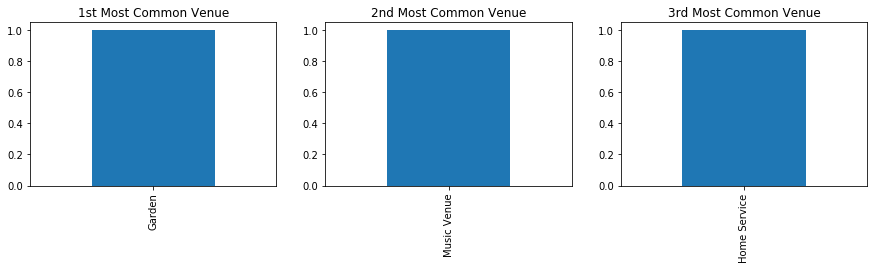

In [587]:
%matplotlib inline

fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
cluster2['1st Most Common Venue'].value_counts().plot(kind='bar',ax=ax1)
cluster2['2nd Most Common Venue'].value_counts().plot(kind='bar',ax=ax2)
cluster2['3rd Most Common Venue'].value_counts().plot(kind='bar',ax=ax3)
ax1.set_title('1st Most Common Venue')
ax2.set_title('2nd Most Common Venue')
ax3.set_title('3rd Most Common Venue')

From the above, we see that cluster 1 has only one neighbourhood. "Garden" is the most common venue as well as "Music Venue". This appears to be an area of the city that is known for its natural beauty. 

---

### Cluster 2

In [588]:
cluster3 = toronto_merged.loc[manhattan_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Text(0.5, 1.0, '3rd Most Common Venue')

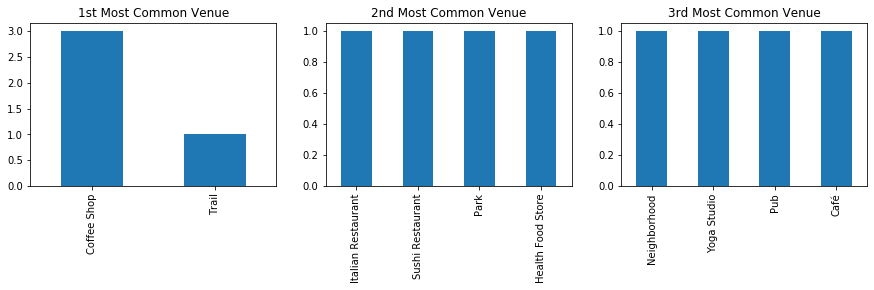

In [589]:
%matplotlib inline

fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
cluster3['1st Most Common Venue'].value_counts().plot(kind='bar',ax=ax1)
cluster3['2nd Most Common Venue'].value_counts().plot(kind='bar',ax=ax2)
cluster3['3rd Most Common Venue'].value_counts().plot(kind='bar',ax=ax3)
ax1.set_title('1st Most Common Venue')
ax2.set_title('2nd Most Common Venue')
ax3.set_title('3rd Most Common Venue')

The cluster above shows a spread of venues around the Postal code. Trail shows up as one of the most common venues as well as park. Using this in conjunction with the location of the postal code (near Cheltenham Park) explains why this postal code was not grouped with the "Food" cluster, cluster 0. 

---

### Cluster 3

In [590]:
cluster4 = toronto_merged.loc[manhattan_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Text(0.5, 1.0, '3rd Most Common Venue')

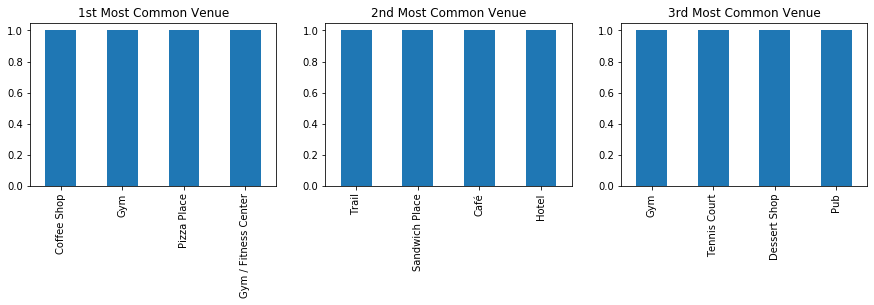

In [591]:
%matplotlib inline

fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
cluster4['1st Most Common Venue'].value_counts().plot(kind='bar',ax=ax1)
cluster4['2nd Most Common Venue'].value_counts().plot(kind='bar',ax=ax2)
cluster4['3rd Most Common Venue'].value_counts().plot(kind='bar',ax=ax3)
ax1.set_title('1st Most Common Venue')
ax2.set_title('2nd Most Common Venue')
ax3.set_title('3rd Most Common Venue')

Cluster 3 is the health/fitness cluster. Gym and Gym/Fitness Center appears as 2 of the 1st most common venues. Also, Trail appears in the 2nd most common venue and Gym appears once again in the 3rd most common venue

---

### Cluster 4

In [592]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Central Toronto,4,Jewelry Store,Trail,Mexican Restaurant,Sushi Restaurant,Yoga Studio,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


The final cluster is different from the others in that, the Jewelry store is the most common venue. 

---

## Conclusion

The small subsection of the Toronto boroughs (boroughs containing the word "Toronto") I used in my analysis, shows very little diversity. Most of the neighbourhoods were clustered into one big cluster mainly comprising of Coffee Shops and Cafes. Therefore one can conclude that the majority of the neighbourhoods analysed are similar. 